In [2]:
DEMOGRAPHICS_PATIENTS = '/run/user/1000/gvfs/sftp:host=tononi-1/Volumes/White_Elephant/Schizophrenia/ShunSasai_SCP_clean/scripts/utils/subj_list/subject_list_patient_COBRE.mat'
DEMOGRAPHICS_CONTROLS = '/run/user/1000/gvfs/sftp:host=tononi-1/Volumes/White_Elephant/Schizophrenia/ShunSasai_SCP_clean/scripts/utils/subj_list/subject_list_control_COBRE.mat'
STRUCTURAL_DERIVATIVES = '/run/user/1000/gvfs/sftp:host=tononi-1/Volumes/White_Elephant/Schizophrenia/Schizconnect_raw_data/COBRE/COBREqsirecon/derivatives/qsirecon-MRtrix3_fork-SS3T_act-HSVS'
FUNCTIONAL_DERIVATIVES = '/run/user/1000/gvfs/sftp:host=tononi-1/Volumes/White_Elephant/Schizophrenia/Schizconnect_raw_data/COBRE/COBRExcpd/'
# ATLASES = ['4S156', '4S256', '4S456']
ATLASES = ['4S156']

def print2(expression: str):
    print('>>> ' + expression)
    print(eval(expression))
    print()

In [4]:
%%time

from bids import BIDSLayout, BIDSLayoutIndexer

indexer = BIDSLayoutIndexer(validate=False, index_metadata=False)

structural_derivatives = BIDSLayout(
    STRUCTURAL_DERIVATIVES,
    indexer=indexer,
)

functional_derivatives = BIDSLayout(
    FUNCTIONAL_DERIVATIVES,
    indexer=indexer,
)

CPU times: user 10.4 s, sys: 381 ms, total: 10.8 s
Wall time: 48.8 s


CPU times: user 10.2 s, sys: 322 ms, total: 10.5 s
Wall time: 46.6 s


In [6]:
from subject import Subject

# A `Subject` is made of a subject label and (optionally) connectivity
# and demographics data:

A00024160 = Subject(
    'A00024160',
    structural_session_label = '20090101',
    structural_derivatives = structural_derivatives.root,
    functional_session_label = '20090101',
    functional_derivatives = functional_derivatives.root,
    atlases = ATLASES,
    demographics = {'diagnosis': 1, 'country': 'XYZ', 'height': 1.8},
)

print2('A00024160')
print2('A00024160.demographics')

ATLAS = ATLASES[0]

print2('A00024160.functional_session')
print2('A00024160.functional_connectivity[ATLAS].region_labels')
print2('A00024160.functional_connectivity[ATLAS].time_series')
print2('A00024160.functional_connectivity[ATLAS].correlation_matrix')
print2('A00024160.functional_connectivity[ATLAS].motion_outliers')
print2('A00024160.functional_connectivity[ATLAS].motion_outliers_ratio')

print2('A00024160.structural_session')
print2('A00024160.structural_connectivity[ATLAS].region_labels')
print2('A00024160.structural_connectivity[ATLAS].region_ids')
print2('A00024160.structural_connectivity[ATLAS].mean_length')
print2('A00024160.structural_connectivity[ATLAS].raw_count')
print2('A00024160.structural_connectivity[ATLAS].sift_count')
print2('A00024160.structural_connectivity[ATLAS].weighted_sift_count')

>>> A00024160
Subject(A00024160, 1)

>>> A00024160.demographics
{'diagnosis': 1, 'country': 'XYZ', 'height': 1.8}

>>> A00024160.functional_session
20090101

>>> A00024160.functional_connectivity[ATLAS].region_labels
('LH_Vis_1', 'LH_Vis_2', 'LH_Vis_3', 'LH_Vis_4', 'LH_Vis_5', 'LH_Vis_6', 'LH_Vis_7', 'LH_Vis_8', 'LH_Vis_9', 'LH_SomMot_1', 'LH_SomMot_2', 'LH_SomMot_3', 'LH_SomMot_4', 'LH_SomMot_5', 'LH_SomMot_6', 'LH_DorsAttn_Post_1', 'LH_DorsAttn_Post_2', 'LH_DorsAttn_Post_3', 'LH_DorsAttn_Post_4', 'LH_DorsAttn_Post_5', 'LH_DorsAttn_Post_6', 'LH_DorsAttn_PrCv_1', 'LH_DorsAttn_FEF_1', 'LH_SalVentAttn_ParOper_1', 'LH_SalVentAttn_FrOperIns_1', 'LH_SalVentAttn_FrOperIns_2', 'LH_SalVentAttn_PFCl_1', 'LH_SalVentAttn_Med_1', 'LH_SalVentAttn_Med_2', 'LH_SalVentAttn_Med_3', 'LH_Limbic_OFC_1', 'LH_Limbic_TempPole_1', 'LH_Limbic_TempPole_2', 'LH_Cont_Par_1', 'LH_Cont_PFCl_1', 'LH_Cont_pCun_1', 'LH_Cont_Cing_1', 'LH_Default_Temp_1', 'LH_Default_Temp_2', 'LH_Default_Par_1', 'LH_Default_Par_2', 'LH_

In [7]:
from cohort import Cohort

# Cohorts can be created by passing an Iterable of `Subjects`:
mycohort = Cohort([A00024160])
print2('mycohort')

# Or by calling the special method `Cohort.cohort_from_data()`, to go
# straight from data paths and BIDS layouts to a Cohort pre-filled
# with Subjects.

patients = Cohort.cohort_from_data(
    DEMOGRAPHICS_PATIENTS,
    structural_derivatives,
    functional_derivatives,
    ATLASES
)

controls = Cohort.cohort_from_data(
    DEMOGRAPHICS_CONTROLS,
    structural_derivatives,
    functional_derivatives,
    ATLASES
)

>>> mycohort
Cohort({Subject(A00024160, 1)})



  0% 0/43 [00:00<?, ?it/s]

  2% 1/43 [01:30<1:03:38, 90.93s/it]

  5% 2/43 [01:34<27:10, 39.76s/it]  

  7% 3/43 [01:41<16:25, 24.65s/it]

  9% 4/43 [01:49<11:38, 17.90s/it]

 12% 5/43 [01:55<08:36, 13.60s/it]

 14% 6/43 [01:56<05:48,  9.41s/it]

 16% 7/43 [01:58<04:15,  7.09s/it]

 19% 8/43 [02:02<03:29,  5.97s/it]

 21% 9/43 [02:03<02:35,  4.58s/it]

 26% 11/43 [02:05<01:28,  2.77s/it]

 30% 13/43 [02:12<01:34,  3.14s/it]

 33% 14/43 [02:13<01:18,  2.71s/it]

 35% 15/43 [02:15<01:06,  2.39s/it]

 37% 16/43 [02:18<01:09,  2.58s/it]

 40% 17/43 [02:18<00:51,  1.98s/it]

 44% 19/43 [02:20<00:35,  1.46s/it]

 47% 20/43 [02:24<00:49,  2.15s/it]

 51% 22/43 [02:26<00:32,  1.57s/it]

 53% 23/43 [02:28<00:35,  1.78s/it]

 58% 25/43 [04:00<05:41, 19.00s/it]

 60% 26/43 [04:06<04:33, 16.11s/it]

 63% 27/43 [04:06<03:17, 12.32s/it]

 65% 28/43 [04:11<02:38, 10.57s/it]

 67% 29/43 [04:16<02:05,  8.97s/it]

 70% 30/43 [04:17<01:29,  6.86s/it]

 72% 31/43 [04:18<01:00,  5.08s/it]

 74% 32/43 [04:19<00:43,  3.99s/it]

 79% 34/43 [04:19<00:19,  2.22s/it]

 84% 36/43 [04:19<00:09,  1.38s/it]

 86% 37/43 [04:20<00:07,  1.22s/it]

 91% 39/43 [04:20<00:03,  1.26it/s]

 95% 41/43 [04:21<00:01,  1.56it/s]

100% 43/43 [04:21<00:00,  1.92it/s]

100% 43/43 [04:21<00:00,  6.09s/it]

  0% 0/55 [00:00<?, ?it/s]

  2% 1/55 [01:21<1:13:41, 81.89s/it]

  4% 2/55 [01:30<34:28, 39.02s/it]  

  5% 3/55 [01:35<20:15, 23.37s/it]

  9% 5/55 [01:40<09:31, 11.43s/it]

 11% 6/55 [01:44<07:45,  9.51s/it]

 15% 8/55 [01:52<05:27,  6.98s/it]

 16% 9/55 [01:54<04:18,  5.62s/it]

 18% 10/55 [01:57<03:42,  4.94s/it]

 20% 11/55 [01:57<02:40,  3.64s/it]

 22% 12/55 [02:00<02:26,  3.42s/it]

 24% 13/55 [02:00<01:52,  2.67s/it]

 25% 14/55 [02:01<01:29,  2.18s/it]

 29% 16/55 [02:05<01:20,  2.07s/it]

 33% 18/55 [02:06<00:54,  1.48s/it]

 35% 19/55 [02:08<00:56,  1.57s/it]

 36% 20/55 [02:10<00:53,  1.54s/it]

 40% 22/55 [02:13<00:53,  1.61s/it]

 42% 23/55 [02:18<01:12,  2.28s/it]

 44% 24/55 [02:18<00:54,  1.76s/it]

 45% 25/55 [04:22<16:38, 33.28s/it]

 47% 26/55 [04:25<12:09, 25.16s/it]

 49% 27/55 [04:30<09:03, 19.41s/it]

 51% 28/55 [04:32<06:36, 14.70s/it]

 55% 30/55 [04:42<04:19, 10.38s/it]

 56% 31/55 [04:43<03:09,  7.89s/it]

 58% 32/55 [04:48<02:48,  7.34s/it]

 60% 33/55 [04:50<02:07,  5.80s/it]

 64% 35/55 [04:52<01:13,  3.68s/it]

 67% 37/55 [04:53<00:43,  2.40s/it]

 69% 38/55 [04:54<00:37,  2.18s/it]

 71% 39/55 [04:54<00:27,  1.71s/it]

 73% 40/55 [04:54<00:19,  1.33s/it]

 75% 41/55 [04:55<00:17,  1.23s/it]

 78% 43/55 [04:56<00:09,  1.21it/s]

 80% 44/55 [04:57<00:10,  1.02it/s]

 82% 45/55 [04:59<00:10,  1.07s/it]

 85% 47/55 [05:00<00:06,  1.14it/s]

 89% 49/55 [05:35<00:42,  7.05s/it]

 93% 51/55 [05:36<00:19,  4.89s/it]

 96% 53/55 [05:37<00:06,  3.33s/it]

 98% 54/55 [05:37<00:02,  2.84s/it]

100% 55/55 [05:38<00:00,  2.26s/it]

100% 55/55 [05:38<00:00,  6.15s/it]

In [9]:
print2("f'{len(patients)} patients and {len(controls)} controls.'")

# Cohorts behave like sets, relying on subject labels for element uniqueness:
print2('set.intersection(patients, controls)')

print2("f'{len(set.union(patients, controls))} subjects in total.'")

# Cohorts also support simple indexing by label:
A00024160 = controls['A00024160']
print2('A00024160')

# Some Subject properties can be aggregated and easily accessed from the Cohort:
print2('patients.labels')
print2('patients.demographics')

>>> f'{len(patients)} patients and {len(controls)} controls.'
43 patients and 55 controls.

>>> set.intersection(patients, controls)
set()

>>> f'{len(set.union(patients, controls))} subjects in total.'
98 subjects in total.

>>> A00024160
Subject(A00024160, HC)

>>> patients.labels
{'A00020602', 'A00014590', 'A00001243', 'A00000541', 'A00018979', 'A00001452', 'A00024568', 'A00020414', 'A00027537', 'A00020787', 'A00000368', 'A00014830', 'A00018317', 'A00023750', 'A00001251', 'A00020416', 'A00015648', 'A00024959', 'A00021591', 'A00019349', 'A00014719', 'A00016723', 'A00009280', 'A00000838', 'A00024228', 'A00023158', 'A00014636', 'A00017147', 'A00021598', 'A00019750', 'A00023243', 'A00024684', 'A00006754', 'A00014804', 'A00027755', 'A00000456', 'A00014607', 'A00027391', 'A00024953', 'A00018403', 'A00001181', 'A00027969', 'A00016197'}

>>> patients.demographics
{'A00020602': {'age': 22, 'sex': 'male', 'subdiagnosis': 'Schizophrenia_Strict', 'diagnosis': 'SSD'}, 'A00014590': {'age': 64, 's

In [10]:
# A Cohort subset can be derived by calling `Cohort.filter()` and passing an
# arbitrary function describing the condition to be met for single subjects.
# This is syntactic sugar for:
#     `subcohort = Cohort(filter(condition, cohort))`

def filter_by_motion(subject):
    threshold = 0.5
    return subject.functional_connectivity[ATLAS].motion_outliers_ratio < threshold

low_motion_patients = patients.filter(filter_by_motion)
low_motion_controls = controls.filter(filter_by_motion)

print2("f'{len(low_motion_patients)} patients and {len(low_motion_controls)} controls.'")

>>> f'{len(low_motion_patients)} patients and {len(low_motion_controls)} controls.'
37 patients and 52 controls.



In [13]:
import numpy as np

structural_functional_corr_controls = [
    np.corrcoef(
        control.structural_connectivity[ATLAS].normalize('raw_count')[:100, :100].flatten(),
        control.functional_connectivity[ATLAS].correlation_matrix[:100, :100].flatten(),
    )[0,1]
    for control in low_motion_controls
]

structural_functional_corr_patients = [
    np.corrcoef(
        patient.structural_connectivity[ATLAS].normalize('raw_count')[:100, :100].flatten(),
        patient.functional_connectivity[ATLAS].correlation_matrix[:100, :100].flatten(),
    )[0,1]
    for patient in low_motion_patients
]

structural_functional_corr = np.array([
    structural_functional_corr_controls + structural_functional_corr_patients
]).flatten()

0.25262404500378227 ± 0.03443127322988019


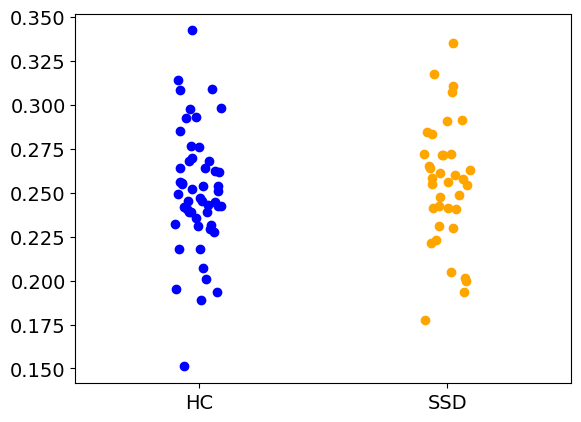

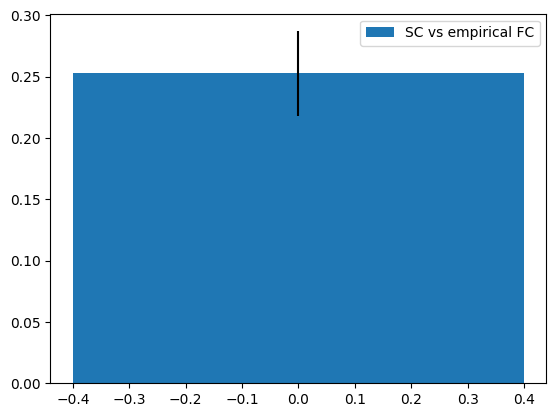

In [15]:
import matplotlib.pyplot as plt
import plot

print(f'{structural_functional_corr.mean()} ± {structural_functional_corr.std()}')

plot.scatter(
    structural_functional_corr_controls,
    structural_functional_corr_patients,
)

plt.figure()
plt.bar(
    0,
    structural_functional_corr.mean(),
    yerr=structural_functional_corr.std(),
    label="SC vs empirical FC",
)
plt.legend()
plt.show()

In [16]:
import quantities

fcs_patients = [
    quantities.fcs(
        subject.functional_connectivity[ATLAS].correlation_matrix[:100, :100],
        absolute=True,
    )
    for subject in low_motion_patients
]

fcs_controls = [
    quantities.fcs(
        subject.functional_connectivity[ATLAS].correlation_matrix[:100, :100],
        absolute=True,
    )
    for subject in low_motion_controls
]

average_fcs_patients = [fcs.mean(axis=0) for fcs in fcs_patients]
average_fcs_controls = [fcs.mean(axis=0) for fcs in fcs_controls]

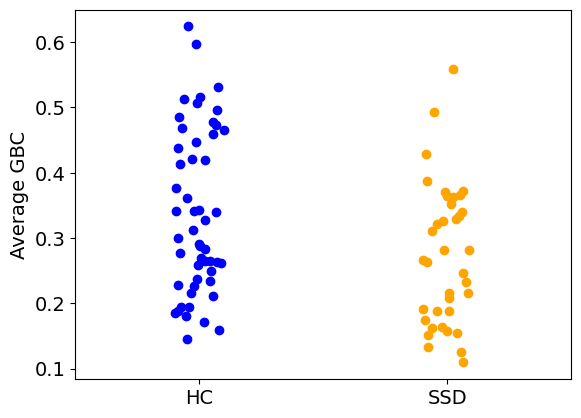

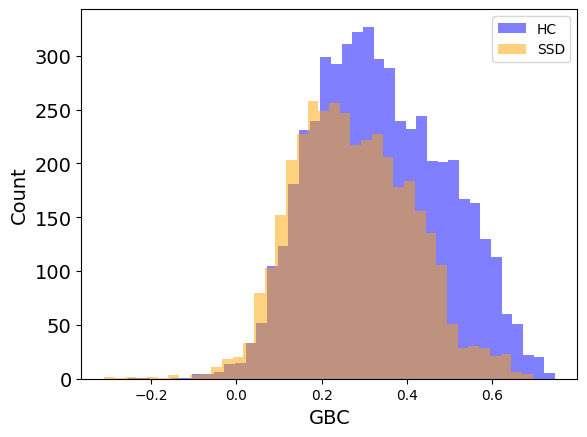

In [17]:
plot.scatter(average_fcs_controls, average_fcs_patients, ylabel="Average GBC")

plot.density(
    np.concatenate(fcs_controls),
    np.concatenate(fcs_patients),
    xlabel="GBC",
    ylabel="Count",
)

In [18]:
import numpy as np

fourier_patients = [
    np.fft.fft(subject.functional_connectivity[ATLAS].time_series, axis=0)
    for subject in low_motion_patients
]

fourier_controls = [
    np.fft.fft(subject.functional_connectivity[ATLAS].time_series, axis=0)
    for subject in low_motion_controls
]

sample_rate = 2                 # Seconds
nyquist_freq = (1 / sample_rate) / 2

band = [0.04, 0.07]

narrowband_patients = []

# for patient in patients:
#     freq = np.fft.fftfreq(patient.shape[0], sample_rate)
#     mask = np.logical_and(band[0] < np.abs(freq), np.abs(freq) < band[1])
#     filtered_fourier = patient * mask

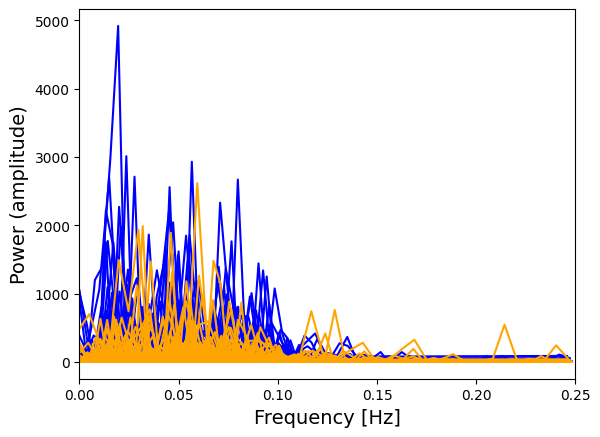

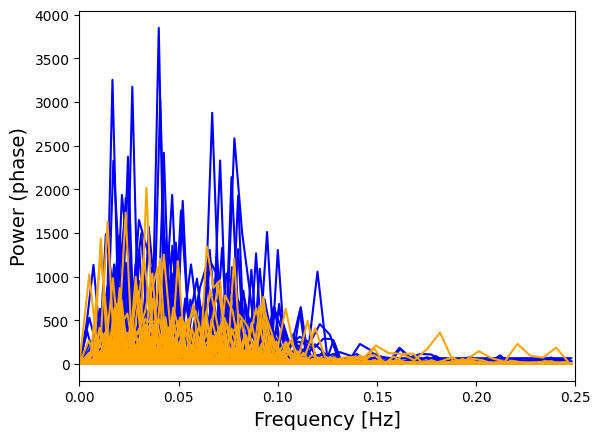

In [19]:
plot.spectrum(
    [c.real.mean(axis=1) for c in fourier_controls],
    [p.real.mean(axis=1) for p in fourier_patients],
    xlim=[0, nyquist_freq],
    xlabel="Frequency [Hz]",
    ylabel="Power (amplitude)",
)

plot.spectrum(
    [c.imag.mean(axis=1) for c in fourier_controls],
    [p.imag.mean(axis=1) for p in fourier_patients],
    xlim=[0, nyquist_freq],
    xlabel="Frequency [Hz]",
    ylabel="Power (phase)",
)


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Let's import the aln model
from neurolib.models.aln import ALNModel

# Some useful functions are provided here
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'